Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names: ['malignant' 'benign']
Decision Tree Accuracy: 0.9087719298245615
Decision Tree Confusion Matrix:
 [[103   8]
 [ 18 156]]


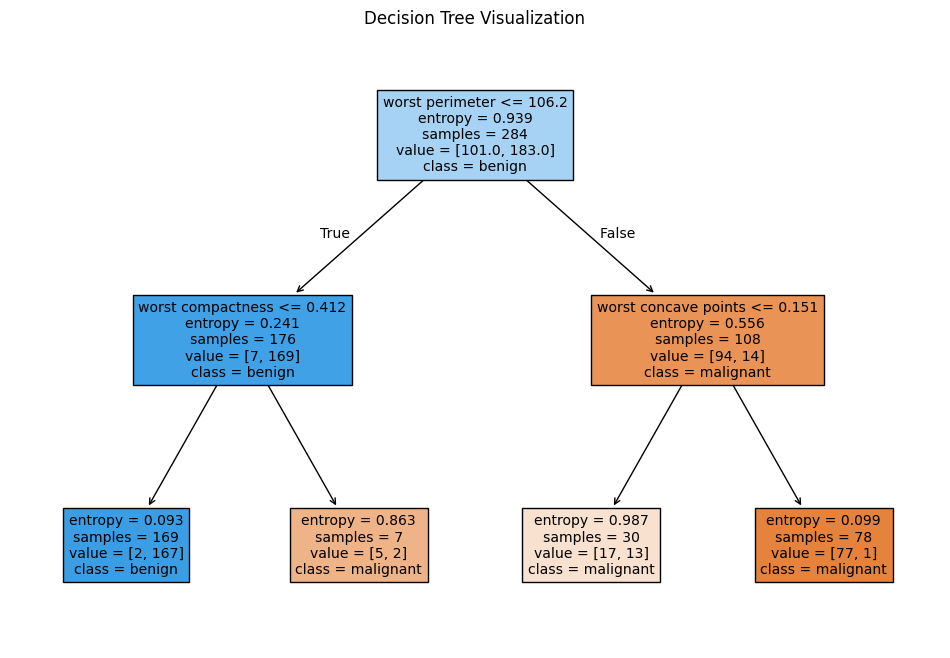

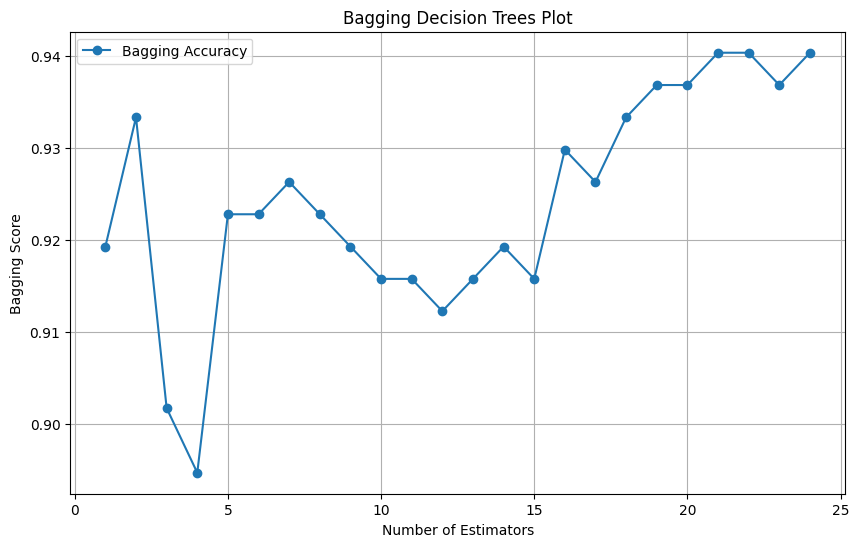

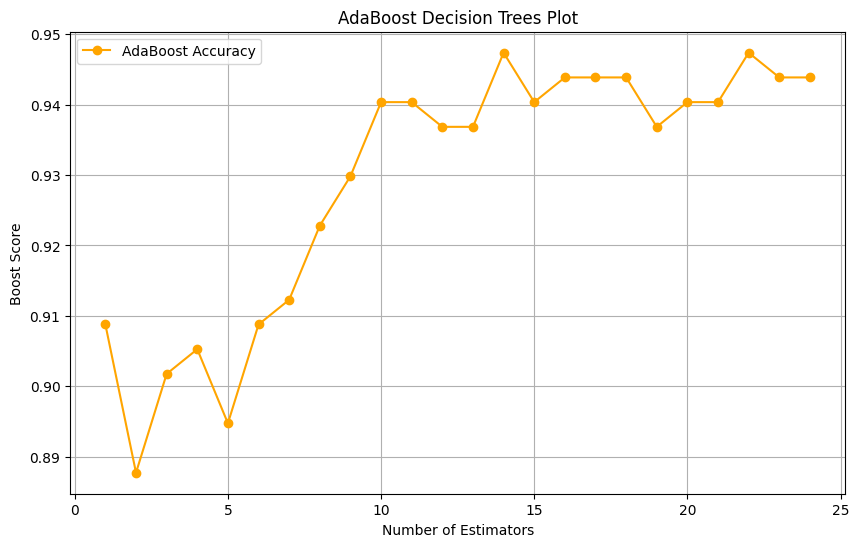

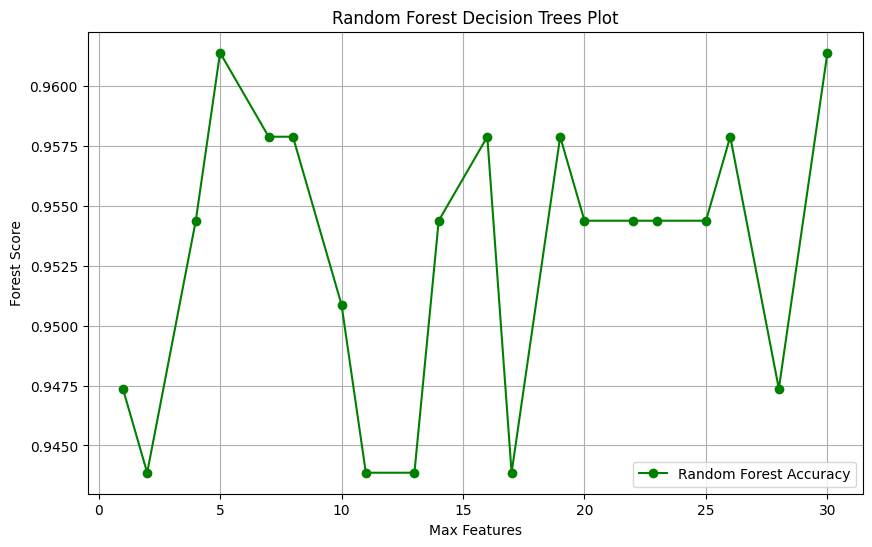

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np


class ClassifierEvaluator:
    def __init__(self):
        self.data = load_breast_cancer()
        self.X, self.y = self.data.data, self.data.target
        self.feature_names = self.data.feature_names
        self.target_names = self.data.target_names
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.5, random_state=8
        )
        self.n_estimators_range = range(1, 25)

    def print_feat_targ(self):
        print(f"Feature Names: {self.feature_names}")
        print(f"Target Names: {self.target_names}")

    def decision_tree(self, max_depth =2):
        dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=8)
        dt.fit(self.X_train, self.y_train)
        y_pred_dt = dt.predict(self.X_test)
        dt_accuracy = accuracy_score(self.y_test, y_pred_dt)
        dt_confusion = confusion_matrix(self.y_test, y_pred_dt)
        print(f"Decision Tree Accuracy: {dt_accuracy}")
        print(f"Decision Tree Confusion Matrix:\n {dt_confusion}")

        # h) Decision Tree Visual
        plt.figure(figsize=(12, 8))
        plot_tree(dt, feature_names=self.feature_names, class_names=self.target_names, filled=True)
        plt.title("Decision Tree Visualization")
        plt.show()

    def bagging(self, max_depth = 2):
        scores = []

        for n_estimators in self.n_estimators_range:
            bagging = BaggingClassifier(
                estimator=DecisionTreeClassifier(criterion="entropy", max_depth=max_depth),
                n_estimators=n_estimators,
                random_state=8,
            )
            bagging.fit(self.X_train, self.y_train)
            y_pred = bagging.predict(self.X_test)
            scores.append(accuracy_score(self.y_test, y_pred))
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.n_estimators_range, scores, marker="o", label="Bagging Accuracy")
        plt.xlabel("Number of Estimators")
        plt.ylabel("Bagging Score")
        plt.title("Bagging Decision Trees Plot")
        plt.legend()
        plt.grid()
        plt.show()

    def ada_boost(self, max_depth =2):
        scores = []

        for n_estimators in self.n_estimators_range:
            adaboost = AdaBoostClassifier(
                estimator=DecisionTreeClassifier(criterion="entropy", max_depth=max_depth),
                n_estimators=n_estimators,
                random_state=8,
                algorithm = "SAMME" # This was giving me a warning
            )
            adaboost.fit(self.X_train, self.y_train)
            y_pred = adaboost.predict(self.X_test)
            scores.append(accuracy_score(self.y_test, y_pred))

        plt.figure(figsize=(10, 6))
        plt.plot(self.n_estimators_range, scores, marker="o", label="AdaBoost Accuracy", color="orange")
        plt.xlabel("Number of Estimators")
        plt.ylabel("Boost Score")
        plt.title("AdaBoost Decision Trees Plot")
        plt.legend()
        plt.grid()
        plt.show()

    def random_forest(self):
        max_features_range = np.linspace(1, self.X.shape[1], 20, dtype=int)
        scores = []

        for max_features in max_features_range:
            random_forest = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=8)
            random_forest.fit(self.X_train, self.y_train)
            y_pred = random_forest.predict(self.X_test)
            scores.append(accuracy_score(self.y_test, y_pred))

        plt.figure(figsize=(10, 6))
        plt.plot(max_features_range, scores, marker="o", label="Random Forest Accuracy", color="green")
        plt.xlabel("Max Features")
        plt.ylabel("Forest Score")
        plt.title("Random Forest Decision Trees Plot")
        plt.legend()
        plt.grid()
        plt.show()

    def evaluate(self):
        self.print_feat_targ()
        self.decision_tree()
        self.bagging()
        self.ada_boost()
        self.random_forest()

if __name__ == "__main__":
    evaluator = ClassifierEvaluator()
    evaluator.evaluate()